# Toy Problem

Comparing grid search, random search, and Bayesian search for 1D problem on first patient.

## Constituent Functions

Term | Roi | FunctionType | DoseLevel | PercentVolume | Weight
-|-|-|-|-|-
0 | PTV | MinDose | 4800 | 0 | 1
1 | PTV | MaxDose | 6240 | 0 | 1
2 | SpinalCanal | MaxDose | 2080 | 0 | 1
3 | Lungs | MaxDvh | 2000 | 10 | 1
4 | Heart | MaxDvh | 2800 | 2 | 1
5 | Chestwall_L | MaxDvh | 3000 | 2 | 1
6 | Rib | MaxDose | [800, 3200] | 0 | 1

## Clinical Goals

Roi | Type | GoalCriteria | AcceptanceLevel | ParameterValue
-|-|-|-|-
PTV | MinDvh | AtLeast | 4800 | 95
PTV | MaxDose | AtMost | 6240 | 0
SpinalCanal | MaxDose | AtMost | 2080 | 0
Lungs | MaxDvh | AtMost | 2000 | 10
Heart | MaxDvh | AtMost | 2800 | 2
Chestwall_L | MaxDvh | AtMost | 3000 | 2
Rib | MaxDose | AtMost | 3200 | 0

In [1]:
from importlib import reload
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../src')
import plots

In [55]:
# Load results
funcs = pd.read_csv('funcs_toy.csv')
goals = pd.read_csv('goals.csv')

# Grid search
pars_grid = pd.read_pickle('pars_grid.npy')
pars_grid = pars_grid[pars_grid['Sample'] < 25]
results_grid = pd.read_pickle('results_grid.npy')
results_grid = results_grid[results_grid['Sample'] < 25]

# Random search
x_rand = np.load('x_iters_rand.npy').squeeze()
fun_rand = np.load('func_vals_rand.npy')

# Bayesian search 
x_gp = np.load('x_iters_gp.npy').squeeze()
x_forest = np.load('x_iters_forest.npy').squeeze()
fun_gp = np.load('func_vals_gp.npy')
fun_forest = np.load('func_vals_forest.npy')

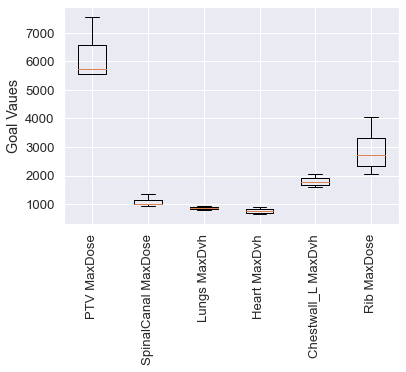

In [8]:
# Clinical goal results from grid search
plots.boxplot(goals[1:], results_grid, 'goals')

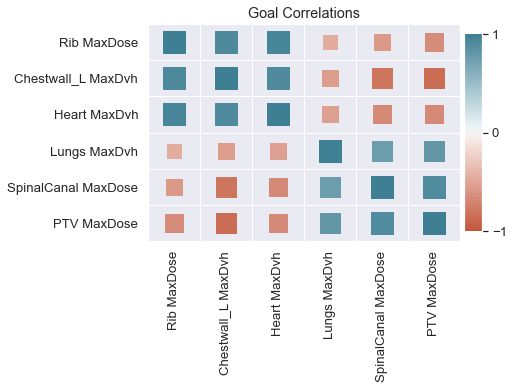

In [9]:
# Goal correlations from grid search
plots.corrplot(goals[1:], results_grid, title='Goal Correlations')

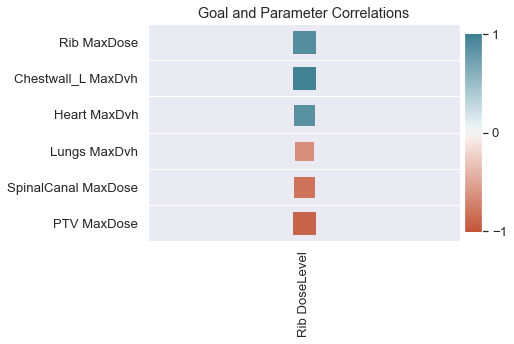

In [13]:
# Goal and parameters correlation from grid search
plots.corrplot(goals[1:], results_grid, funcs, pars_grid, 'Goal and Parameter Correlations')

In [37]:
# Compute penalty values for grid search
fun_grid = 0
x_grid, _ = plots.format_data(funcs, pars_grid, 'pars')
x_grid = x_grid[0].values
ydata, _ = plots.format_data(goals[1:], results_grid, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    fun_grid += (ydata[ii] - level)/level

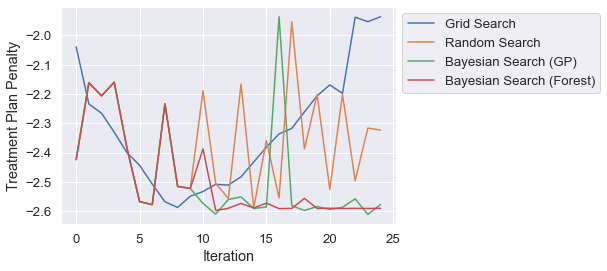

In [46]:
# Compare convergence of optimization methods
plt.plot(fun_grid)
plt.plot(fun_rand)
plt.plot(fun_gp)
plt.plot(fun_forest)
plt.xlabel('Iteration')
plt.ylabel('Treatment Plan Penalty')
plt.legend(['Grid Search', 'Random Search', 'Bayesian Search (GP)', 'Bayesian Search (Forest)'],
           bbox_to_anchor=(1, 1));

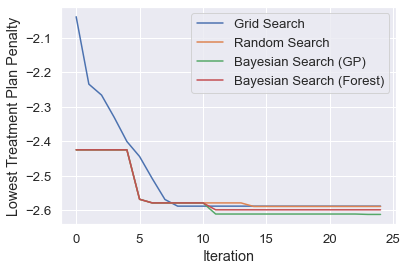

In [62]:
# Compare convergence of optimization methods
plt.plot(np.minimum.accumulate(fun_grid))
plt.plot(np.minimum.accumulate(fun_rand))
plt.plot(np.minimum.accumulate(fun_gp))
plt.plot(np.minimum.accumulate(fun_forest))
plt.xlabel('Iteration')
plt.ylabel('Lowest Treatment Plan Penalty')
plt.legend(['Grid Search', 'Random Search', 'Bayesian Search (GP)', 'Bayesian Search (Forest)'],
           bbox_to_anchor=(1, 1));

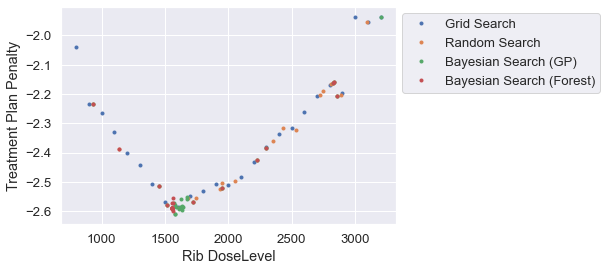

In [43]:
# Compare penalty value results
plt.plot(x_grid, fun_grid, '.')
plt.plot(x_rand, fun_rand, '.')
plt.plot(x_gp, fun_gp, '.')
plt.plot(x_forest, fun_forest, '.')
plt.xlabel('Rib DoseLevel')
plt.ylabel('Treatment Plan Penalty')
plt.legend(['Grid Search', 'Random Search', 'Bayesian Search (GP)', 'Bayesian Search (Forest)'],
           bbox_to_anchor=(1, 1));

In [63]:
# Compare optimal results

def print_opt(x, fun, method):
    idx = np.argmin(fun)
    print(f'{method} Rib DoseLevel: {x[idx]}, Penalty Value: {fun[idx]:.2f}')
    
print_opt(x_grid, fun_grid, 'Grid Search')
print_opt(x_rand, fun_rand, 'Random Search')
print_opt(x_gp, fun_gp, 'Bayesian Search (GP)')
print_opt(x_forest, fun_forest, 'Bayesian Search (Forest)')

Grid Search Rib DoseLevel: 1600.0, Penalty Value: -2.59
Random Search Rib DoseLevel: 1609.7507850014442, Penalty Value: -2.59
Bayesian Search (GP) Rib DoseLevel: 1580.0282932223702, Penalty Value: -2.61
Bayesian Search (Forest) Rib DoseLevel: 1561.8852225963185, Penalty Value: -2.60


In [ ]:
# Need to get goal values and dose-volume histograms of optimal plans!

In [ ]:
# Curious to see surrogate functions for Bayesian methods!